In [ ]:
# pip install scikit-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [14]:
df=pd.read_csv("customer_churn_dataset_1000.csv")
df
# df.isnull().sum()

,age,gender,subscription_type,contract_type,tenure_months,avg_monthly_spend,customer_support_calls,has_internet_service,payment_method,churn
0,70,female,standard,monthly,59,1128,4,yes,paypal,1
1,44,female,basic,monthly,44,1544,5,yes,debit card,1
2,78,female,premium,monthly,19,862,2,yes,credit card,0
3,49,male,premium,yearly,22,1819,2,yes,paypal,0
4,59,male,basic,quarterly,32,1830,3,yes,bank transfer,0
...,...,...,...,...,...,...,...,...,...,...
995,55,male,standard,quarterly,64,1239,1,yes,paypal,0
996,23,female,standard,quarterly,51,1236,1,yes,debit card,1
997,57,male,standard,quarterly,4,1277,1,yes,debit card,1
998,40,female,basic,monthly,29,1791,2,no,bank transfer,1


In [15]:
label=LabelEncoder()
df["gender"]=label.fit_transform(df["gender"])  
df["subscription_type"]=label.fit_transform(df["subscription_type"])
df["contract_type"]=label.fit_transform(df["contract_type"])
df["has_internet_service"]=label.fit_transform(df["has_internet_service"])
df["payment_method"]=label.fit_transform(df["payment_method"])
df

,age,gender,subscription_type,contract_type,tenure_months,avg_monthly_spend,customer_support_calls,has_internet_service,payment_method,churn
0,70,0,2,0,59,1128,4,1,3,1
1,44,0,0,0,44,1544,5,1,2,1
2,78,0,1,0,19,862,2,1,1,0
3,49,1,1,2,22,1819,2,1,3,0
4,59,1,0,1,32,1830,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,55,1,2,1,64,1239,1,1,3,0
996,23,0,2,1,51,1236,1,1,2,1
997,57,1,2,1,4,1277,1,1,2,1
998,40,0,0,0,29,1791,2,0,0,1


In [16]:
x=df.drop("churn",axis=1) #features
y=df["churn"] # target

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [20]:
accuracy=accuracy_score(y_pred,y_test)
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score75.50%


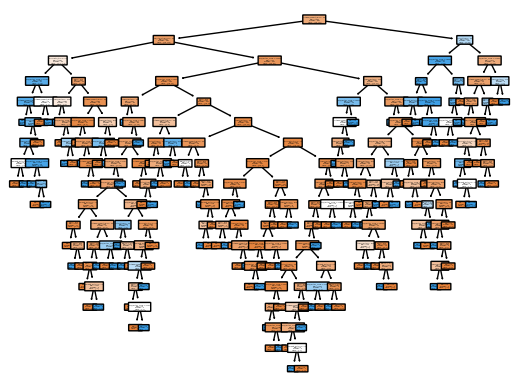

In [21]:
plot_tree(model,filled=True,rounded=True,feature_names=x.columns,class_names=["Not Churn","Churn"])
plt.show()

In [22]:
# new data
new_data=pd.DataFrame({
  "age":[40],
  "gender":label.fit_transform(["male"]),
  "subscription_type":label.fit_transform(["premium"]),
  "contract_type":label.fit_transform(["yearly"]),
  "tenure_months":[23],
   "avg_monthly_spend":[1212],
   "customer_support_calls":[3],
   "has_internet_service":label.fit_transform(["yes"]),
   "payment_method":label.fit_transform(["debit card"])

})
predict=model.predict(new_data)
predict

array([1])